# Volume 1: Image Segmentation

    Ethan Crawford
    Math 345
    10/31/22

**Lab Objective:** Graph theory has a variety of applications. A graph (or network) can be represented
in many ways on a computer. In this lab I study a common matrix representation for graphs and show how certain properties of the matrix representation correspond to inherent properties of the
original graph. I also use tools for working with images in Python, and conclude with an application of using graphs and linear algebra to segment images.

In [39]:
import image_segmentation_functions as seg
import numpy as np
from scipy import linalg as la
from imageio.v2 import imread
from matplotlib import pyplot as plt
import scipy.sparse
import scipy.sparse.linalg

## Problem 1:

    Write a function that accepts the adjacency matrix A of a graph G and compute the Laplacian matrix L of G.

In [40]:
A = np.array([[0,3,0,0,0,0],
              [3,0,0,0,0,0],
              [0,0,0,1,0,0],
              [0,0,1,0,2,0.5],
              [0,0,0,2,0,1],
              [0,0,0,0.5,1,0]])

my_laplacian = seg.laplacian(A)
scipy_laplacian = scipy.sparse.csgraph.laplacian(A)

print("My laplacian:", my_laplacian, sep = "\n")
print("Scipy laplacian:", scipy_laplacian, sep = "\n")

print("Are they equal?", np.allclose(my_laplacian, scipy_laplacian))

My laplacian:
[[ 3.  -3.   0.   0.   0.   0. ]
 [-3.   3.   0.   0.   0.   0. ]
 [ 0.   0.   1.  -1.   0.   0. ]
 [ 0.   0.  -1.   3.5 -2.  -0.5]
 [ 0.   0.   0.  -2.   3.  -1. ]
 [ 0.   0.   0.  -0.5 -1.   1.5]]
Scipy laplacian:
[[ 3.  -3.  -0.  -0.  -0.  -0. ]
 [-3.   3.  -0.  -0.  -0.  -0. ]
 [-0.  -0.   1.  -1.  -0.  -0. ]
 [-0.  -0.  -1.   3.5 -2.  -0.5]
 [-0.  -0.  -0.  -2.   3.  -1. ]
 [-0.  -0.  -0.  -0.5 -1.   1.5]]
Are they equal? True


## Problem 2. 
    Write a function that accepts the adjacency matrix A of a graph G and a small tolerance value tol. Compute the number of connected components in G and its algebraic connectivity. Consider all eigenvalues that are less than the given tol to be zero.


In [41]:
con = seg.connectivity(A)

print(con)

(2, 0.0)


## Problem 3-4

1. Write the constructor so that it accepts the name of an image file. Read the image, scale it so that it contains floats between 0 and 1, then store it as an attribute. If the image is in color, compute its brightness matrix by averaging the RGB values at each pixel (if it is a grayscale image, the image array itself is the brightness matrix). Flatten the brightness
matrix into a 1-D array and store it as an attribute.
2. Write a method called show_original() that displays the original image. If the original image is grayscale.
3. Write a method for the ImageSegmenter class that accepts floats *r* defaulting to
$5$, $\sigma_B^2$ defaulting to $.02$, and $\sigma_X^2$ defaulting to $3$. Compute the adjacency matrix $A$ and the
degree matrix $D$ according to the weights.
4. Initialize $A$ as a *scipy.sparse.lil_matrix*, which is optimized for incremental construction. Fill in the nonzero elements of *$A$ one row at a time. Use *get_neighbors()* at each step
to help compute the weights.
5. Convert A to a *scipy.sparse.csc_matrix*, which is faster for computations.

## Problem 5. 
Write a method for the ImageSegmenter class that accepts an adjacency matrix
$A$ as a *scipy.sparse.csc_matrix* and a degree matrix $D$ as a 1-D NumPy array. Construct an $m × n$ boolean mask describing the segments of the image.
1. Compute the Laplacian $L$
2. Construct $D^{−1/2}$ as a sparse diagonal matrix using $D$, then
compute $D^{−1/2} L D^{−1/2}$.
3. Compute the eigenvector corresponding to the second-smallest eigenvalue of $D^{−1/2} L D^{−1/2}$. 
4. Reshape the eigenvector as a $m × n$ matrix and use this matrix to construct the desired boolean mask.

## Problem 6. 
Write a method for the ImageSegmenter class that accepts floats $r \text{,} \sigma_B^2 \text{,} \sigma_X^2$
with the same defaults as in Problem 4. Call methods from Problems 4 and 5 to obtain the segmentation mask and plot.


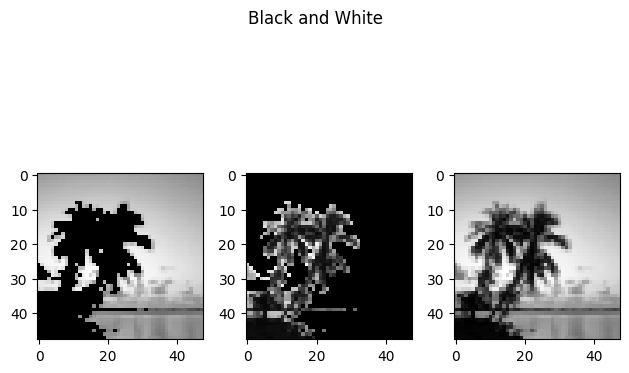

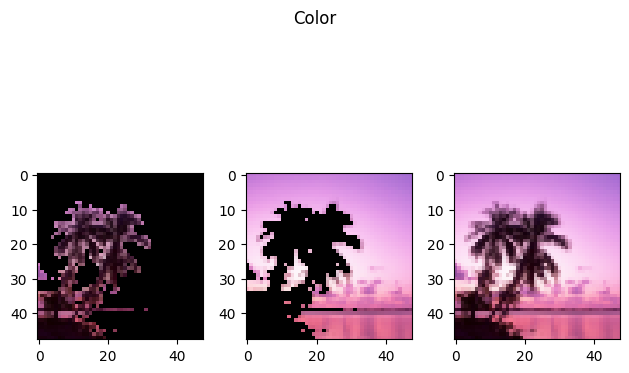

In [42]:
# Print the results of problems 3-6
seg.ImageSegmenter("img_files/dream_gray.png").segment()
seg.ImageSegmenter("img_files/dream.png").segment()